In [54]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import time
import sys
import warnings
warnings.filterwarnings("ignore")

seed = 782
np.random.seed(seed)

In [55]:
df = pd.read_csv('../input/train.csv')

train = df.as_matrix()

train_y = train[:, 0].astype('int8')

train_x = train[:, 1:].astype('float64')

train = None

In [56]:
print("Shape train Images: (%d, %d)" % (train_x.shape))
print("Shape labels: (%d)" % train_y.shape)

Shape train Images: (42000, 784)
Shape labels: (42000)


In [57]:
df = pd.read_csv("../input/test.csv")
test = df.as_matrix().astype('float64')
print("Shape test Images: (%d, %d)" % (test.shape))

Shape test Images: (28000, 784)


In [58]:
def show_image(image, shape, label="", cmp=None):
    img = np.reshape(image, shape)
    plt.imshow(img, cmap=cmp,  interpolation='none')
    plt.title(label)

In [59]:
%matplotlib inline

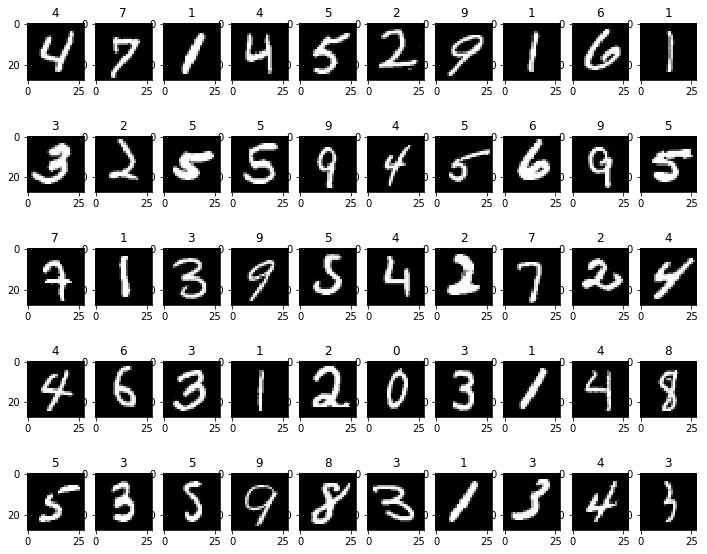

In [60]:
plt.figure(figsize=(12, 10))
y, x = 5, 10
for i in range(0, (y*x)):
    plt.subplot(y, x, i + 1)
    ni = np.random.randint(0, train_x.shape[0], 1)[0]
    show_image(train_x[ni], (28, 28),train_y[ni], cmp='gray')
plt.show()

# 统计每种情况出现的次数（0-9）

In [61]:
def count_example_per_digit(examples):
    hist = np.ones(10)
    for y in examples:
        hist[y] += 1
    colors = []
    for i in range(10):
        colors.append(plt.get_cmap('viridis')(np.random.uniform(0.0, 1.0, 1)[0]))
    bar  = plt.bar(np.arange(10), hist, 0.8, color=colors)
    plt.grid()
    plt.show()

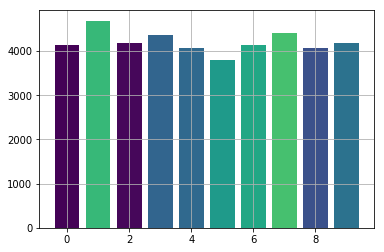

In [62]:
count_example_per_digit(train_y)

# 标准化

 对于该数据集来说，像素值位于0-255之间，要将其标准化为0-1之间。

In [71]:
def normalization(x, mu, sigma):
    x_norm = np.zeros_like(x)
    for n in range(len(x)):
        for j in range(len(x[n])):
            if sigma[j] != 0:
                x_norm[n, j] = (x[n, j] - mu[j]) / sigma[j]
            else:
                x_norm[n, j] = 0
    return x_norm

In [72]:
mu = np.mean(train_x, axis = 0)

In [77]:
sigma = np.max(train_x, axis=0) - np.min(train_x, axis = 0)

In [78]:
test = normalization(test, mu, sigma)
train_x = normalization(train_x, mu, sigma)

In [79]:
print("Test Min： %.2f" % np.min(test))
print("Test Max: %.2f" % np.max(test))
print("Train min %.2f" % np.min(train_x))
print("Train max %.2f" % np.max(train_x))

Test Min： -0.55
Test Max: 5.17
Train min -0.55
Train max 1.00


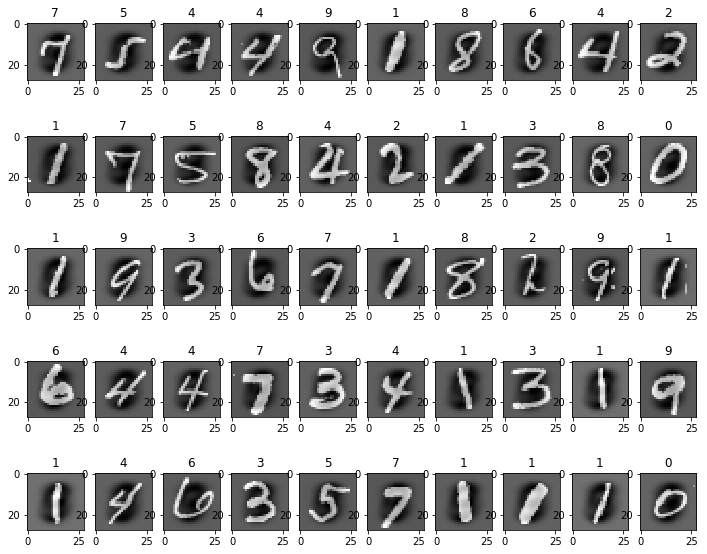

In [68]:
%matplotlib inline
plt.figure(figsize=(12, 10))
y, x = 5, 10
for i in range(y * x):
    plt.subplot(y, x, i + 1)
    ni = np.random.randint(0, train_x.shape[0], 1)[0]
    show_image(train_x[ni], (28, 28), train_y[ni],  cmp='gray')
plt.show()

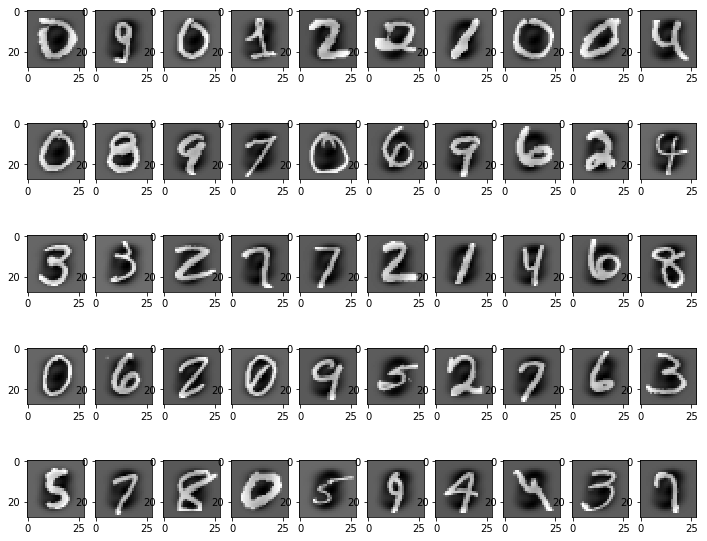

In [69]:
%matplotlib inline
plt.figure(figsize=(12, 10))
y, x = 5, 10
for i in range(y * x):
    plt.subplot(y, x, i + 1)
    ni = np.random.randint(0, test.shape[0], 1)[0]
    show_image(test[ni], (28, 28),  cmp='gray')
plt.show()

# one hot 编码

In [80]:
train_y = pd.get_dummies(train_y).as_matrix()

# 定义模型

## 激活函数
Relu激活函数

In [82]:
def Relu(x, derivative=False):
    if(derivative==False):
        return x*(x > 0)
    else:
        return 1*(x > 0)


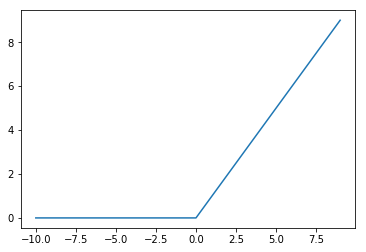

In [83]:
x = np.arange(20) - 10
relu = Relu(x)
plt.plot(x, relu)
plt.show()

In [84]:
def Softmax(x):
    x -= np.max(x)
    sm = (np.exp(x).T / np.sum(np.exp(x), axis=1)).T
    return sm

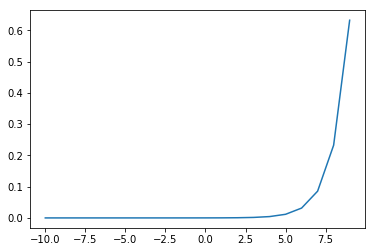

In [88]:
x = np.arange(20) - 10
softmax = Softmax([x])
plt.plot(x, softmax[0])
plt.show()